<a href="https://colab.research.google.com/github/OluwatimilehinF/Personal-tasks/blob/main/Product_purchase_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
#PREDICTING PURCHASE OF MOBILE PHONE

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
#Import file

In [119]:
from google.colab import files
uploaded = files.upload()

Saving DigitalAd_dataset.csv to DigitalAd_dataset (2).csv


In [120]:
import io
df = pd.read_csv(io.BytesIO(uploaded['DigitalAd_dataset.csv']))

In [121]:
#Quick check of dataset

In [122]:
df.shape

(400, 3)

In [123]:
df.head()

,Age,Salary,Status
0,18,82000,0
1,29,80000,0
2,47,25000,1
3,45,26000,1
4,46,28000,1


In [124]:
#Descriptive statistics

In [125]:
df.describe()

,Age,Salary,Status
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [126]:
#Visualizing

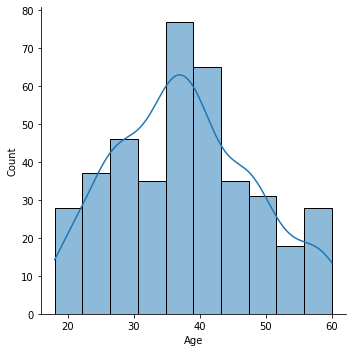

In [127]:
sns.displot(df['Age'], kde=True)


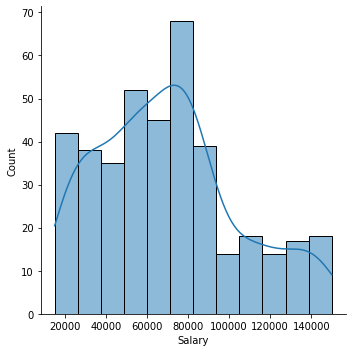

In [128]:
sns.displot(df['Salary'], kde=True)

In [129]:
#Outlier not spotted. But let's check

In [130]:
#CHECK FOR OUTLIER

In [131]:
age = df['Age']
sal = df['Salary']
outliers = []
def detect_outliers_iqr(ag):
    ag = ag.sort_values()
    Q1 = np.percentile(ag, 25)
    Q3 = np.percentile(ag, 75) 
    #print(q1, q3)
    IQR =     Q3-Q1
    lwr_bound = Q1-(1.5*IQR)
    upr_bound = Q3+(1.5*IQR)

    for i in ag:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers


sample_outliers_age = detect_outliers_iqr(age)
sample_outliers_sal = detect_outliers_iqr(sal)
print("Outliers: ", sample_outliers_age)
print("Outliers: ", sample_outliers_sal)

Outliers:  []
Outliers:  []


In [132]:
#Segregatinfg Datase

In [134]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [202]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)


In [203]:
#Feature scaling

In [204]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [205]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [206]:
#Training the data set

In [207]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [208]:
#Prediction for test data

In [209]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [210]:
y_test

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [211]:
#Checking for accuracy

In [212]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix is:")
print(cm)

confusion matrix is:
[[39  1]
 [ 8 12]]


In [213]:
print("Accuracy of model:", format(accuracy_score(y_test, y_pred)*100))

Accuracy of model: 85.0


In [215]:
#PREDICTION FOR NEW ENTRIES

In [217]:
age = int(input("Enter Customer's Age "))
sal = int(input("Enter Customer's Salary "))
Customer = [[age, sal]]
prediction  = lr.predict(sc.transform(Customer))
if prediction == 1:
    print('Customer will likely purchase the product')
else:
     print("Customer will not likely purchase the product")

Enter Customer's Age 30
Enter Customer's Salary 75000
Customer will not likely purchase the product
